# (Ford Gobike Investigation)
## by (Abdallah El-Sawy)

## Investigation Overview

> i have gone through some many steps to reach the final overview of the dataset which give me very important insights about the relation between customers, subscribers and the gender with bike riding over time.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Individual rides in a bike-sharing system that covers the larger San Francisco Bay region are included in this data collection. The focus of the Ford GoBike dataset is on the start time (hour, day, month) in order to determine when and by whom the bikes are in great demand. dataset containing the trip data of the ford gobike 183412 trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### (age distribution)

> it is clear that most of the riders its average age is about 34 years old

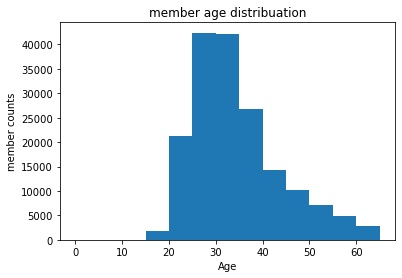

In [3]:
df['member_age'] = 2019-df['member_birth_year']
bin_edges = np.arange(0, 70, 5)

plt.hist(data = df, x = 'member_age', bins = bin_edges);

plt.title('member age distribuation')
plt.xlabel('Age')
plt.ylabel('member counts')
plt.show()

## (the number of trips analysis per hour)

> it is clear that the rush time for the riders to ride the bikes is at 8-9 am and 5-6 pm

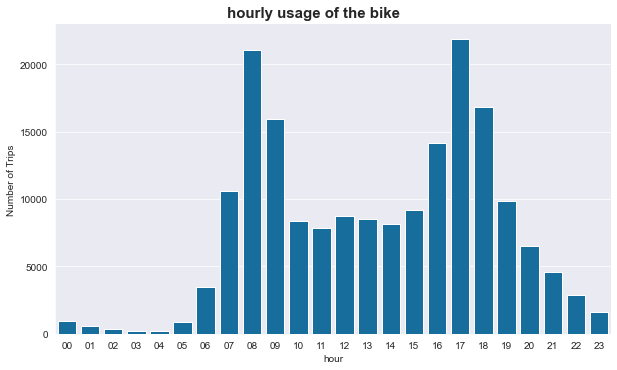

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time']   = pd.to_datetime(df['end_time'])
df['start_date']  = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour']  = df.start_time.dt.strftime('%H')
df['start_day']   = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

graph = sb.catplot(data=df, x='start_hour', kind='count', sharey = False,
            color = base_color, aspect = 1.7)

graph.set_axis_labels("hour", "Number of Trips")
graph.fig.suptitle('hourly usage of the bike ', y=1.02, fontsize=15, fontweight='bold');


## (Customers and Subscribers hourly rides during weekdays)

> from the two heat maps we find out customers have much usage and most of it during afternon weekends but in other hand subscribers have much usage during the rest of the week during the moring and at the end of the day.

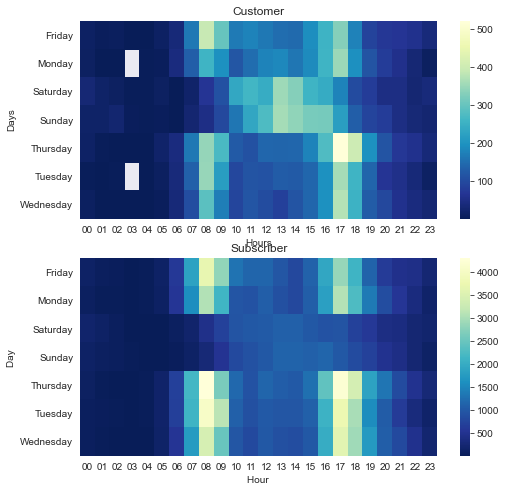

In [5]:

plt.figure(figsize=[8, 8]);


plt.subplot(2, 1, 1)

customers = df.query('user_type == "Customer"')

customers_counts = customers.groupby(['start_day', 'start_hour']).size()

customers_counts = customers_counts.reset_index(name='count')

customers_counts = customers_counts.pivot(index='start_day', 
                                          columns='start_hour', values='count')

sb.heatmap(customers_counts, cmap='YlGnBu_r');

plt.title('Customer');

plt.xlabel('Hours');
plt.ylabel('Days');


plt.subplot(2, 1, 2)

subscribers = df.query('user_type == "Subscriber"')

counts = subscribers.groupby(['start_day', 'start_hour']).size()

counts = counts.reset_index(name='count')

counts = counts.pivot(index='start_day', columns='start_hour', values='count')

sb.heatmap(counts, cmap='YlGnBu_r');

plt.title('Subscriber') ;

plt.xlabel('Hour ');
plt.ylabel('Day ');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!